# Stock Prediction

This practice note starts from the "twstock" package.

For ML predicting the stock price this ipynb will use the python packege of DataReader.

Many programmers on Kaggler had solved the similiar questions .

Here are some refence belowed：

URL：https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm

https://twstock.readthedocs.io/

https://ithelp.ithome.com.tw/articles/10205113

https://twstock.readthedocs.io/zh_TW/latest/quickstart.html#id2

https://pypi.org/project/twstock/

twstock was created by Louie Lu <git@louie.lu>.

In [1]:
import twstock
twstock.__update_codes()
import pandas as pd
import numpy as np
import pandas_datareader as pdr

#time
import datetime as datetime
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline
from  tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM,Dense


In [2]:
#0050股價存入
stock0050=twstock.Stock('0050')

In [3]:
#擷取最新股價
print(stock0050.date[-1])
print(stock0050.open[-1])
print(stock0050.high[-1])
print(stock0050.low[-1])
print(stock0050.price[-1])


2022-11-18 00:00:00
114.9
115.85
114.05
114.25


# 即時股價

In [4]:
stock = twstock.realtime.get('2881')
print(stock)

{'timestamp': 1668753000.0, 'info': {'code': '2881', 'channel': '2881.tw', 'name': '富邦金', 'fullname': '富邦金融控股股份有限公司', 'time': '2022-11-18 14:30:00'}, 'realtime': {'latest_trade_price': '55.3000', 'trade_volume': '-', 'accumulate_trade_volume': '7643', 'best_bid_price': ['55.2000', '55.1000', '55.0000', '54.9000', '54.8000'], 'best_bid_volume': ['61', '66', '514', '297', '214'], 'best_ask_price': ['55.3000', '55.4000', '55.5000', '55.6000', '55.7000'], 'best_ask_volume': ['17', '220', '185', '286', '318'], 'open': '55.0000', 'high': '55.9000', 'low': '55.0000'}, 'success': True}


# Fetch Data

In [5]:
#兩隻ETF價格存入
start = datetime.datetime(2017,1,1)
df_00878 = pdr.DataReader('00878.TW', 'yahoo', start=start)
df_00881 = pdr.DataReader('00881.TW', 'yahoo', start=start)

In [6]:
df_00878.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 581 entries, 2020-07-10 to 2022-11-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       581 non-null    float64
 1   Low        581 non-null    float64
 2   Open       581 non-null    float64
 3   Close      581 non-null    float64
 4   Volume     581 non-null    int64  
 5   Adj Close  581 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 31.8 KB


In [7]:
df_00881.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 482 entries, 2020-12-01 to 2022-11-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       482 non-null    float64
 1   Low        482 non-null    float64
 2   Open       482 non-null    float64
 3   Close      482 non-null    float64
 4   Volume     482 non-null    int64  
 5   Adj Close  482 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 26.4 KB


In [8]:
df_00878.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 581 entries, 2020-07-10 to 2022-11-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       581 non-null    float64
 1   Low        581 non-null    float64
 2   Open       581 non-null    float64
 3   Close      581 non-null    float64
 4   Volume     581 non-null    int64  
 5   Adj Close  581 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 31.8 KB


# 股價視覺化

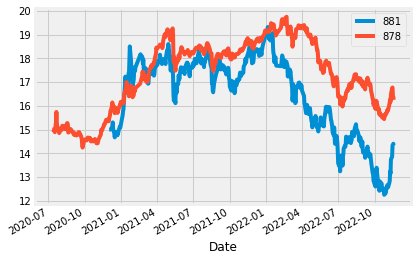

In [9]:
fig = plt.figure()
df_00881['Adj Close'].plot(label="881")
df_00878['Adj Close'].plot(label="878")
plt.legend()

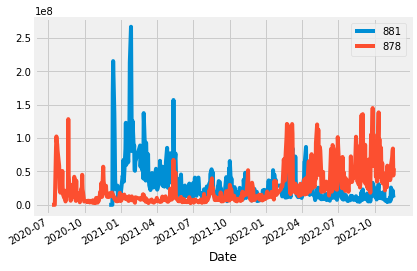

In [10]:
fig = plt.figure()
df_00881['Volume'].plot(label="881")
df_00878['Volume'].plot(label="878")
plt.legend()

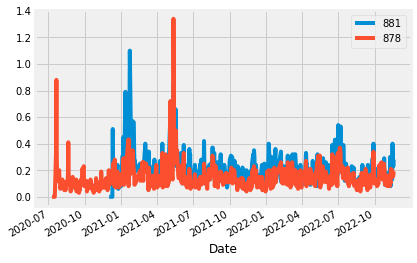

In [11]:
df_00881['High-Low'] = df_00881['High'] - df_00881['Low']
df_00878['High-Low'] = df_00878['High'] - df_00878['Low']

fig = plt.figure()
df_00881['High-Low'].plot(label="881")
df_00878['High-Low'].plot(label='878')
plt.legend()

# 買點判斷

In [12]:
from twstock import BestFourPoint

In [13]:
df = twstock.Stock('2330')
bfp=BestFourPoint(df)
print('是否為四大買點：',bfp.best_four_point_to_buy()) 
print('是否為四大賣點：',bfp.best_four_point_to_sell())  
print(bfp.best_four_point())

是否為四大買點： 量縮價不跌, 三日均價大於六日均價
是否為四大賣點： False
(True, '量縮價不跌, 三日均價大於六日均價')


# 股價分析

start_date=datetime.datetime(開始日期)

end_date = datetime.datetime(結束日期)

which_stock='股票代碼.TW'

In [14]:
#參數設定
start_date=datetime.datetime(2020,1,1)
end_date = datetime.datetime(2022,11,19)
which_stock='0050.TW'

In [15]:
#資料讀取
def get_data(which_stock,start_date,end_date):
    df_stock = pdr.DataReader(which_stock, 'yahoo', start=start_date,end=end_date)
    return df_stock
#股價視覺化
def present_data(df):
    plt.figure(figsize=(16,6))
    plt.title('Adj Close Price History')
    plt.plot(df['Adj Close'])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Adj Close', fontsize=18)
    plt.show()
 


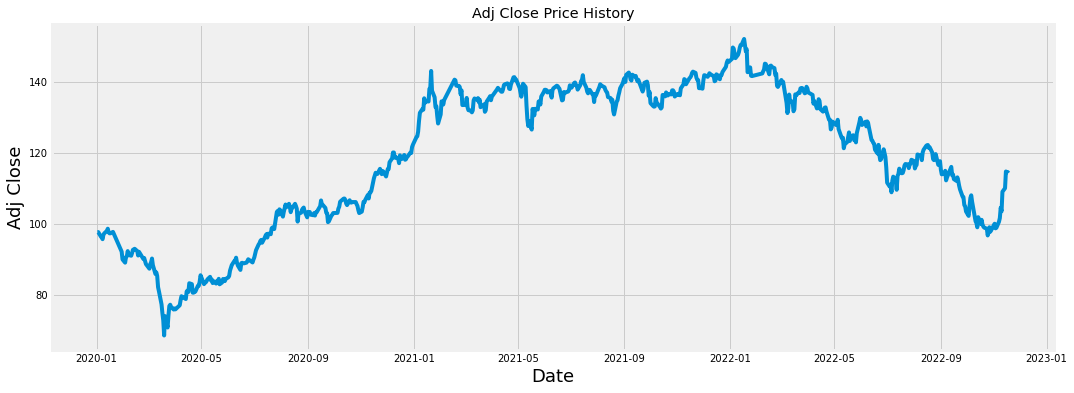

In [16]:
df_stock=get_data(which_stock,start_date,end_date)
present_data(df_stock)
#讀取收盤價
temp=df_stock.filter(['Adj Close'])
np_df_adjclose=temp.values
training_data_len = int(np.ceil( len(np_df_adjclose) * .8 ))
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np_df_adjclose)


In [20]:
#分割出訓練資料集
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []


for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



In [21]:
#建立模型
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')
#print(x_train.shape,y_train.shape)
History=model.fit(x_train, y_train, batch_size=10, epochs=100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 128)           66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 25)                1625      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
51/51 [==============================] - 3s 64ms/step - loss: 0.0307
Epoch 2/100
51/51 [==============================] - 3s 63ms/step - loss: 0.0018
Epoch 3/100
51/51 [==============================] - 3s 66ms/step - loss: 0.0015
Epoch

51/51 [==============================] - 4s 83ms/step - loss: 3.9140e-04
Epoch 87/100
51/51 [==============================] - 4s 82ms/step - loss: 3.9722e-04
Epoch 88/100
51/51 [==============================] - 4s 84ms/step - loss: 3.9506e-04
Epoch 89/100
51/51 [==============================] - 4s 87ms/step - loss: 3.4546e-04
Epoch 90/100
51/51 [==============================] - 4s 81ms/step - loss: 3.5630e-04
Epoch 91/100
51/51 [==============================] - 4s 81ms/step - loss: 3.3816e-04
Epoch 92/100
51/51 [==============================] - 4s 86ms/step - loss: 3.9605e-04
Epoch 93/100
51/51 [==============================] - 4s 82ms/step - loss: 3.6894e-04
Epoch 94/100
51/51 [==============================] - 4s 84ms/step - loss: 3.7257e-04
Epoch 95/100
51/51 [==============================] - 4s 73ms/step - loss: 4.3063e-04
Epoch 96/100
51/51 [==============================] - 4s 79ms/step - loss: 4.0039e-04
Epoch 97/100
51/51 [==============================] - 4s 75ms/step 

In [22]:
#分割測試資料
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = np_df_adjclose[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
#模型預測
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)



In [23]:
#rmse結果
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1.9459208363569778

C:\anaconda3\envs\tf37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


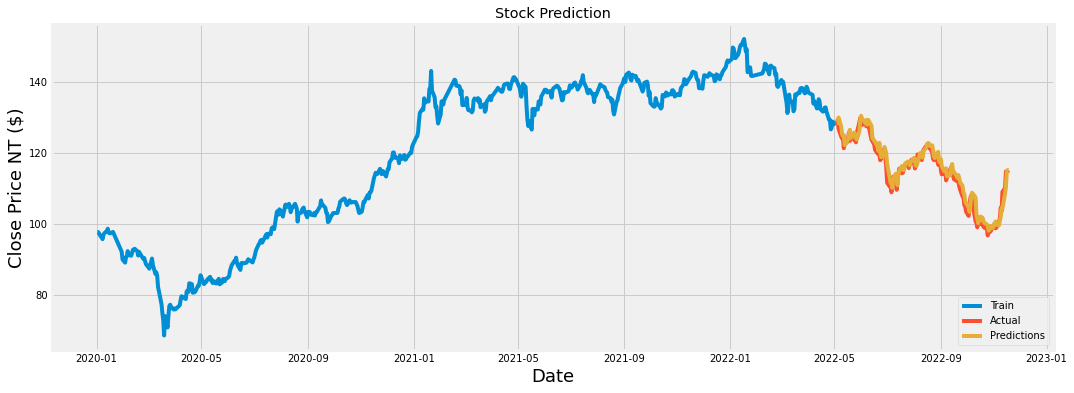

In [27]:
#結果呈現
train = df_stock[:training_data_len]
valid = df_stock[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Stock Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price NT ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [25]:
#結果股價比對
print(valid[['Close', 'Predictions']])

                 Close  Predictions
Date                               
2022-05-04  127.800003   128.468277
2022-05-05  129.250000   128.431992
2022-05-06  126.650002   129.886780
2022-05-09  124.550003   127.319061
2022-05-10  124.000000   125.231255
...                ...          ...
2022-11-14  110.000000   108.473923
2022-11-15  114.699997   110.352463
2022-11-16  114.500000   114.556053
2022-11-17  114.550003   115.087303
2022-11-18  114.250000   115.013016

[140 rows x 2 columns]
